In [4]:
# Loading required libraries for the project

import numpy as np
import pandas as pd
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
# Import necessary components from Keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf






import seaborn as sns #provides a high-level interface for drawing attractive and informative statistical graphics.
import matplotlib.pyplot as plt #library for creating static, animated, and interactive visualizations in Python.
import plotly.express as px #create beautifully interactive and publication-quality graphs and charts.
import graphviz #open-source graph visualization software that provides a way to represent structural information as diagrams of abstract graphs and networks.
import sklearn as sk #open-source Python library for machine learning, offering tools for data mining and analysis.  It supports various machine-learning models for classification, regression, clustering, and more.

In [6]:
print(f"Current working directory: {os.getcwd()}")


Current working directory: /Users/abdullah/Desktop/GradProjectCode


In [7]:
import os
# Path to the dataset
dataset_path = 'BT-New dataset'  # Relative path to the dataset

# Subdirectories to process
subdirs = ['no', 'yes', 'pred']

# Iterating through each subdirectory and listing all the files
for subdir in subdirs:
    subdir_path = os.path.join(dataset_path, subdir)  # Create a new path by combining with the subdirectories
    print(f"Listing files in {subdir_path}:")
    files = os.listdir(subdir_path)  # List all files of the subdirectory
    for file in files:
        # Path to the file for further processing when needed
        file_path = os.path.join(subdir_path, file)  # Subdirectory "YES" or "NO" + file name = full path for the file
        print(file_path)


Listing files in BT-New dataset/no:
BT-New dataset/no/no1157.jpg
BT-New dataset/no/no132.jpg
BT-New dataset/no/no654.jpg
BT-New dataset/no/no640.jpg
BT-New dataset/no/no898.jpg
BT-New dataset/no/no126.jpg
BT-New dataset/no/no1143.jpg
BT-New dataset/no/no668.jpg
BT-New dataset/no/no1194.jpg
BT-New dataset/no/no697.jpg
BT-New dataset/no/no683.jpg
BT-New dataset/no/no1180.jpg
BT-New dataset/no/no873.jpg
BT-New dataset/no/no867.jpg
BT-New dataset/no/no1433.jpg
BT-New dataset/no/no456.jpg
BT-New dataset/no/no330.jpg
BT-New dataset/no/no1355.jpg
BT-New dataset/no/no1341.jpg
BT-New dataset/no/no324.jpg
BT-New dataset/no/no442.jpg
BT-New dataset/no/no1427.jpg
BT-New dataset/no/no1369.jpg
BT-New dataset/no/no318.jpg
BT-New dataset/no/no495.jpg
BT-New dataset/no/no1396.jpg
BT-New dataset/no/no1382.jpg
BT-New dataset/no/no481.jpg
BT-New dataset/no/no522.jpg
BT-New dataset/no/no244.jpg
BT-New dataset/no/no1221.jpg
BT-New dataset/no/no1235.jpg
BT-New dataset/no/no250.jpg
BT-New dataset/no/no536.jpg

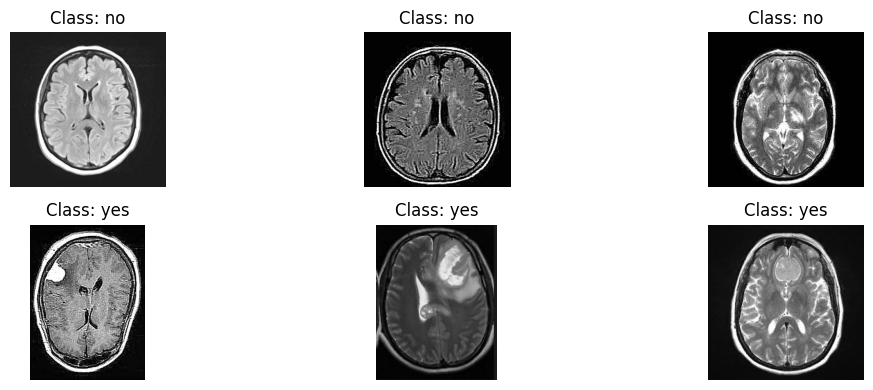

In [8]:
#Image Visualization for a sample of the DATA, 'YES' 'NO' Classes

def visualize_images(dataset_path, subdirs=['no', 'yes'], samples_per_class=3): # This is for visulizing samples from Class YES 'has tumors', Class NO 'Has NO Tumors'
# 3 samples each class 3 * 'NO'  - 3 * 'YES'

    plt.figure(figsize=(12, 4)) #specific size of the figure
    for idx, subdir in enumerate(subdirs): # 'enumerate' provides a counter (idx) along with the value (subdir) as you iterate over the list.

        subdir_path = os.path.join(dataset_path, subdir) #creating full path to the subdirectory
        files = os.listdir(subdir_path)[:samples_per_class]  # Get the first few samples.slicing to get the first three [:]
        for i, file in enumerate(files): # loop over within index
            img_path = os.path.join(subdir_path, file) #creat image path
            img = plt.imread(img_path) # read the image file
            plt.subplot(len(subdirs), samples_per_class, idx * samples_per_class + i + 1)
            # Subplot for each image. num of rows = 2 'number of subdirectories' = 'YES' , 'NO'
            # Columns = 3, 'Number of samples per class'

            plt.imshow(img, cmap='gray') #set to grayscale
            plt.title(f"Class: {subdir}")
            plt.axis('off')
    plt.tight_layout() 
    plt.show()

visualize_images(dataset_path)


In [9]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

def resize_and_check_images(dataset_path, subdirs=['no', 'yes'], target_size=(128, 128)):
    for subdir in subdirs:
        subdir_path = os.path.join(dataset_path, subdir)
        files = os.listdir(subdir_path)

        for file in files:
            img_path = os.path.join(subdir_path, file)
            img = cv2.imread(img_path)  # Read the image with OpenCV
            img_resized = cv2.resize(img, target_size)  # Resize the image to the target size

            # Print the shape of the resized image
            print(f"{file}: Resized shape={img_resized.shape}")

resize_and_check_images(dataset_path)

no1157.jpg: Resized shape=(128, 128, 3)
no132.jpg: Resized shape=(128, 128, 3)
no654.jpg: Resized shape=(128, 128, 3)
no640.jpg: Resized shape=(128, 128, 3)
no898.jpg: Resized shape=(128, 128, 3)
no126.jpg: Resized shape=(128, 128, 3)
no1143.jpg: Resized shape=(128, 128, 3)
no668.jpg: Resized shape=(128, 128, 3)
no1194.jpg: Resized shape=(128, 128, 3)
no697.jpg: Resized shape=(128, 128, 3)
no683.jpg: Resized shape=(128, 128, 3)
no1180.jpg: Resized shape=(128, 128, 3)
no873.jpg: Resized shape=(128, 128, 3)
no867.jpg: Resized shape=(128, 128, 3)
no1433.jpg: Resized shape=(128, 128, 3)
no456.jpg: Resized shape=(128, 128, 3)
no330.jpg: Resized shape=(128, 128, 3)
no1355.jpg: Resized shape=(128, 128, 3)
no1341.jpg: Resized shape=(128, 128, 3)
no324.jpg: Resized shape=(128, 128, 3)
no442.jpg: Resized shape=(128, 128, 3)
no1427.jpg: Resized shape=(128, 128, 3)
no1369.jpg: Resized shape=(128, 128, 3)
no318.jpg: Resized shape=(128, 128, 3)
no495.jpg: Resized shape=(128, 128, 3)
no1396.jpg: Resi

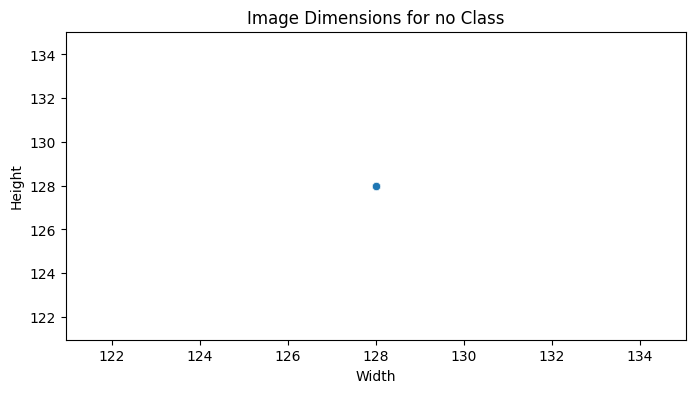

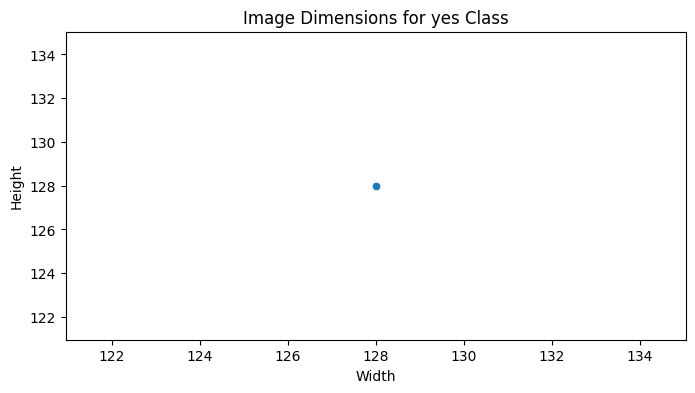

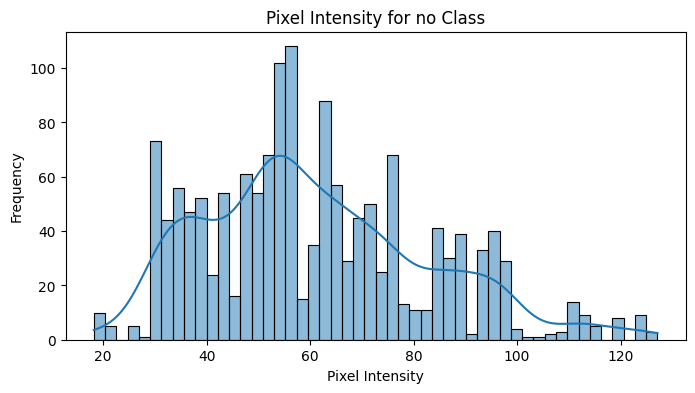

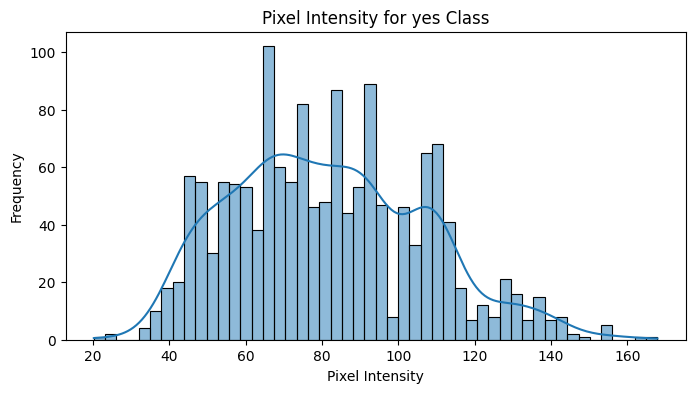

In [10]:
#Analysing the Image Dimensions + Intensity
#Variablity: Tells how far apart points lie from each other and from the center of a distribution or a data set
#Intensity: Helps in understanding the brightness, darkeness of the image to help make further actions like Normalization

def analyze_dimensions_intensity_resized(dataset_path, subdirs=['no', 'yes'], target_size=(128, 128)):
    dimensions = {'no': [], 'yes': []}
    intensities = {'no': [], 'yes': []}

    for subdir in subdirs:
        subdir_path = os.path.join(dataset_path, subdir)
        files = os.listdir(subdir_path)

        for file in files:
            img_path = os.path.join(subdir_path, file)
            img = cv2.imread(img_path)  # Use cv2 for reading the image
            img_resized = cv2.resize(img, target_size)  # Resize the image

            # Dimension analysis
            dimensions[subdir].append(img_resized.shape[:2])


            # Pixel intensity analysis
            intensities[subdir].append(np.mean(img_resized)) #Add the Intensity of the image to the list

    # Visualizing results


    # Image Dimensions
    for key, val in dimensions.items(): #Iterate to look for Dimensions distribution
        dims = np.array(val) #convert to a numpy array for easier manuplation
        plt.figure(figsize=(8, 4)) #figure size for the plot
        sns.scatterplot(x=dims[:,0], y=dims[:,1])
        plt.title(f"Image Dimensions for {key} Class")
        plt.xlabel("Width")
        plt.ylabel("Height")
        plt.show()

    # Pixel Intensities
    for key, val in intensities.items():#Iterate to look for Intensities distribution
        plt.figure(figsize=(8, 4))
        sns.histplot(val, bins=50, kde=True)
        plt.title(f"Pixel Intensity for {key} Class")
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Frequency")
        plt.show()

analyze_dimensions_intensity_resized(dataset_path)


# Week 3-4

Now Accomplishing 'week 1-2' Tasks successfully

We have the following

Tasks for week 3-4:
* Preproccess the dataset ---> Resizing, Normalization and augmentation.
* Split the dataset into training and testing sets
* Implement and train tradition learning Models(SVM, Random Forest)
* Begin the implementation of CNN 'Convolutional Neural Network' for deep learning


## Preprocess the dataset

In [11]:
subdirs = ['no', 'yes']

#storing data and labels
data = []
labels = []

# Preprocessing
for subdir in subdirs:
    files = os.listdir(os.path.join(dataset_path, subdir))  # List files in subdir

    for file in files:
        img_path = os.path.join(dataset_path, subdir, file)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (64, 64))  # Resizing

        # Normalizing the image
        image = image / 255.0

        data.append(image)  # Append proccessed to the data list
        labels.append(subdir)

# data and lables to numpy arrays to proccess with machine learning
data = np.array(data)
labels = np.array(labels)


data = data.reshape((data.shape[0], 64, 64, 1))

# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [12]:
len(X_train), len(X_test)

(2400, 600)

In [13]:
new_df = pd.DataFrame({'Labels': labels})
y_train_labels = pd.DataFrame({'Y_Train': y_train})
y_test_labels = pd.DataFrame({'Y_Test': y_test})

In [14]:
print(f"Whole Data:\n{new_df['Labels'].value_counts()}")
print(f"Y Train ({len(y_train)})\n{y_train_labels['Y_Train'].value_counts()}")
print(f"Y Test ({len(y_test)})\n{y_test_labels['Y_Test'].value_counts()}")

Whole Data:
Labels
no     1500
yes    1500
Name: count, dtype: int64
Y Train (2400)
Y_Train
yes    1213
no     1187
Name: count, dtype: int64
Y Test (600)
Y_Test
no     313
yes    287
Name: count, dtype: int64


## Augmentation using ImageDataGenerator class by Keras Library/ Spliting data into training/testing sets

In [15]:
datagen = ImageDataGenerator( # Defining Paramters for the augmented data
    rotation_range=20,  #  Random rotate of images
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'  # Fill in new pixels that may emerge after a rotation or width/height shifts
)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))  # Add the channel dimension
datagen.fit(X_train)  # Now fit the data generator
#X_train.shape == num of images in the dataset
#X_train.shape [1] , X_train.shape[2] ==> height, width
#1 Keras requires (batch_size, height, width, channels). greyscale channel is 1


datagen.fit(X_train) # when data are under the proccess of training, augmented data will be generated


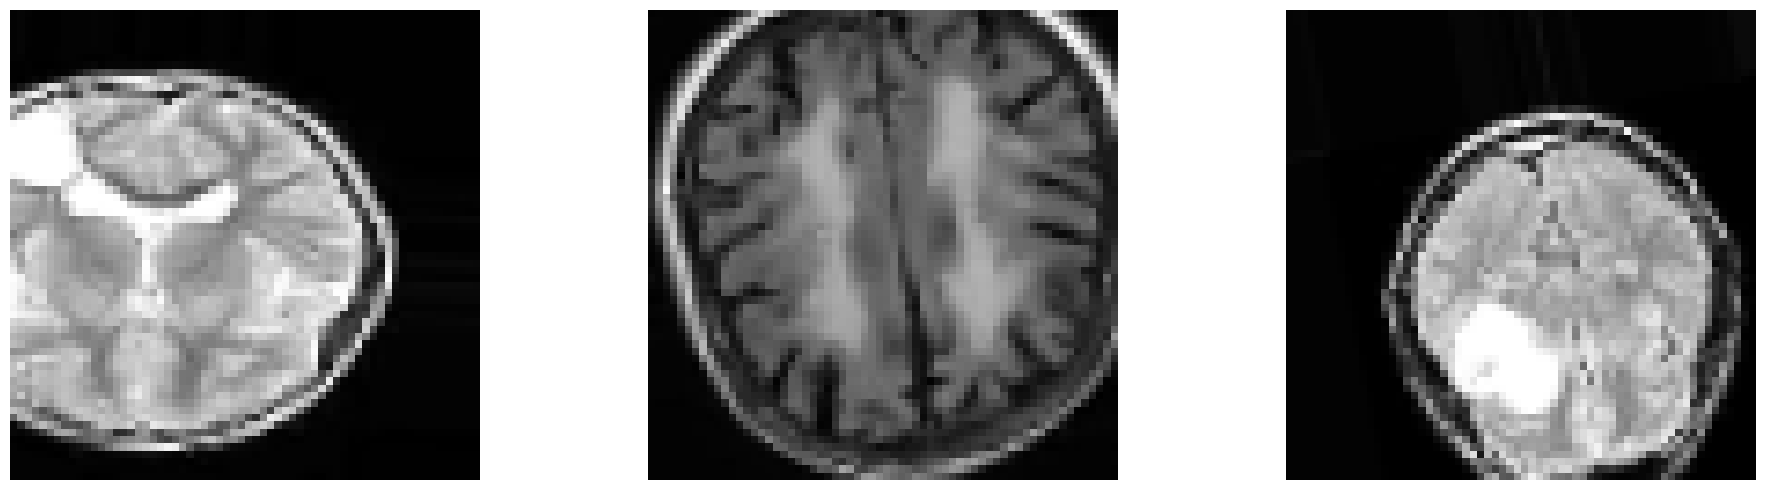

In [16]:
#SHOW a sample of augmented images

augmented_images = datagen.flow(X_train, batch_size=3)  # Generate 3 images

x_batch = next(augmented_images)

# Ploting the new Images
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, ax in enumerate(axes):
    ax.imshow(x_batch[i].reshape(64, 64), cmap='gray')  # Display each image
    ax.axis('off')  # Hide axes for clarity
plt.tight_layout()
plt.show()

In [17]:
len(augmented_images)

800

In [18]:
# Converting string labels to binary integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Converts 'no' -> 0 and 'yes' -> 1
y_test_encoded = label_encoder.transform(y_test)


## Implementing Traditional Machine Learning Models (SVM, Random Forest)

In [19]:
#Getting data ready for machine Learning
# Flatten the images for traditional ML models: 2D to 1D to use for ML models
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))
# Converting string labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# SVM Model
svm_model = svm.SVC(gamma='scale')
svm_model.fit(X_train_flat, y_train_encoded)
# Predictions
svm_predictions = svm_model.predict(X_test_flat)
svm_accuracy = accuracy_score(y_test_encoded, svm_predictions)
print(f'SVM Accuracy: {svm_accuracy}')
print(classification_report(y_test_encoded, svm_predictions, target_names=label_encoder.classes_))



# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_flat, y_train_encoded)
# Predictions
rf_predictions = rf_model.predict(X_test_flat)
rf_accuracy = accuracy_score(y_test_encoded, rf_predictions)
print(f'Random Forest Accuracy: {rf_accuracy}')
print(classification_report(y_test_encoded, rf_predictions, target_names=label_encoder.classes_))


SVM Accuracy: 0.9416666666666667
              precision    recall  f1-score   support

          no       0.95      0.94      0.94       313
         yes       0.93      0.95      0.94       287

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600

Random Forest Accuracy: 0.9466666666666667
              precision    recall  f1-score   support

          no       0.96      0.94      0.95       313
         yes       0.94      0.95      0.94       287

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600



## Macine Learning Model/Building and Analyzing the CNN Architecture


In [60]:
# Setting random seeds for reproducibility
np.random.seed(1)
tf.random.set_seed(2)

# Convert labels to numeric
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# CNN architecture
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)), #32 CNN
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'), #64 CNN
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'), #128 CNN
        MaxPooling2D((2, 2)),
        Conv2D(256, (3, 3), activation='relu', padding='same'), #265 CNN
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

cnn_model = create_model()

# Callbacks
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)

# Fit the model using the data generator
history = cnn_model.fit(
    datagen.flow(X_train, y_train_encoded, batch_size=32),
    steps_per_epoch=len(X_train) // 32,
    epochs=25,
    validation_data=(X_test, y_test_encoded),
    callbacks=[lr_reduction, early_stopping, model_checkpoint]  # Include callbacks here
)


Epoch 1/25


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


 2/75 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.6250 - loss: 0.6135  

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.6633 - loss: 0.7302 - val_accuracy: 0.6950 - val_loss: 0.6757 - learning_rate: 0.0010
Epoch 2/25


2024-04-03 01:48:54.100906: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6950 - val_loss: 0.6757 - learning_rate: 0.0010
Epoch 3/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.7333 - loss: 0.5420 - val_accuracy: 0.7733 - val_loss: 0.6645 - learning_rate: 0.0010
Epoch 4/25


2024-04-03 01:48:58.107284: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7733 - val_loss: 0.6645 - learning_rate: 0.0010
Epoch 5/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.7826 - loss: 0.4750 - val_accuracy: 0.7800 - val_loss: 0.6123 - learning_rate: 0.0010
Epoch 6/25


2024-04-03 01:49:02.023590: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7800 - val_loss: 0.6123 - learning_rate: 0.0010
Epoch 7/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.8367 - loss: 0.3853 - val_accuracy: 0.8683 - val_loss: 0.5310 - learning_rate: 0.0010
Epoch 8/25


2024-04-03 01:49:05.922229: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8683 - val_loss: 0.5310 - learning_rate: 0.0010
Epoch 9/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.8643 - loss: 0.3245 - val_accuracy: 0.9117 - val_loss: 0.4137 - learning_rate: 0.0010
Epoch 10/25


2024-04-03 01:49:09.788567: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9117 - val_loss: 0.4137 - learning_rate: 0.0010
Epoch 11/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.9156 - loss: 0.2200 - val_accuracy: 0.9333 - val_loss: 0.3075 - learning_rate: 0.0010
Epoch 12/25


2024-04-03 01:49:13.649597: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9333 - val_loss: 0.3075 - learning_rate: 0.0010
Epoch 13/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.9280 - loss: 0.1929 - val_accuracy: 0.9417 - val_loss: 0.1960 - learning_rate: 0.0010
Epoch 14/25


2024-04-03 01:49:17.516724: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9417 - val_loss: 0.1960 - learning_rate: 0.0010
Epoch 15/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9361 - loss: 0.1727
Epoch 15: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.9362 - loss: 0.1727 - val_accuracy: 0.9250 - val_loss: 0.1743 - learning_rate: 0.0010
Epoch 16/25


2024-04-03 01:49:21.360914: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9250 - val_loss: 0.1743 - learning_rate: 5.0000e-04
Epoch 17/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.9546 - loss: 0.1342 - val_accuracy: 0.9633 - val_loss: 0.1135 - learning_rate: 5.0000e-04
Epoch 18/25


2024-04-03 01:49:25.271929: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9633 - val_loss: 0.1135 - learning_rate: 5.0000e-04
Epoch 19/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9584 - loss: 0.1259
Epoch 19: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.9584 - loss: 0.1258 - val_accuracy: 0.9617 - val_loss: 0.1161 - learning_rate: 5.0000e-04
Epoch 20/25


2024-04-03 01:49:29.116068: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9617 - val_loss: 0.1161 - learning_rate: 2.5000e-04
Epoch 21/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.9578 - loss: 0.1040 - val_accuracy: 0.9683 - val_loss: 0.0926 - learning_rate: 2.5000e-04
Epoch 22/25


2024-04-03 01:49:32.998549: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9683 - val_loss: 0.0926 - learning_rate: 2.5000e-04
Epoch 23/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.9692 - loss: 0.0988 - val_accuracy: 0.9783 - val_loss: 0.0687 - learning_rate: 2.5000e-04
Epoch 24/25


2024-04-03 01:49:36.855910: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9783 - val_loss: 0.0687 - learning_rate: 2.5000e-04
Epoch 25/25
74/75 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9762 - loss: 0.0723
Epoch 25: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.9762 - loss: 0.0723 - val_accuracy: 0.9717 - val_loss: 0.0791 - learning_rate: 2.5000e-04


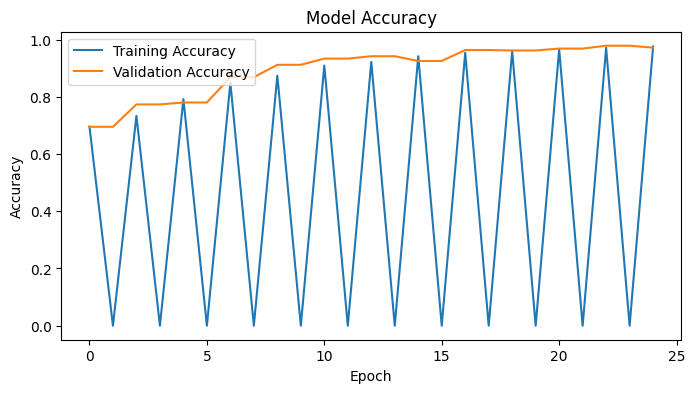

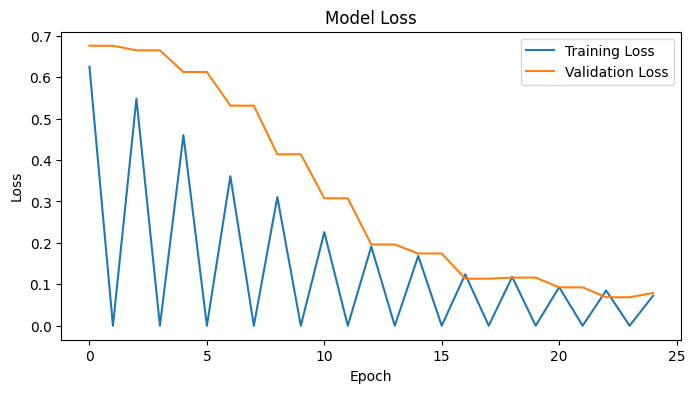

In [61]:
# Plotting the training & validation accuracy
plt.figure(figsize=(8, 4))
plt.plot(history.history.get('accuracy') or history.history.get('acc'), label='Training Accuracy')
plt.plot(history.history.get('val_accuracy') or history.history.get('val_acc'), label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# Plotting the training & validation loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [62]:
scores = cnn_model.evaluate(X_test, y_test_encoded)
print(f'Test accuracy: {scores[1] * 100:.2f}%')


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9767 - loss: 0.0661
Test accuracy: 97.17%


In [64]:
max_train_acc = max(history.history['accuracy']) * 100
max_val_acc = max(history.history['val_accuracy']) * 100
print(f'Maximum training accuracy: {max_train_acc:.2f}%')
print(f'Maximum validation accuracy: {max_val_acc:.2f}%')


Maximum training accuracy: 97.58%
Maximum validation accuracy: 97.83%


In [71]:
# Load the image
img_path = 'BT-New dataset/yes/y49.jpg'  # Replace with your image path
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was properly loaded
if image is None:
    print(f"Failed to load image at path: {img_path}")
else:
    # Preprocess the image
    image_resized = cv2.resize(image, (64, 64))  # Resize to match the model's expected input
    image_normalized = image_resized / 255.0     # Normalize pixel values to [0, 1]
    image_reshaped = np.reshape(image_normalized, (1, 64, 64, 1))  # Add batch dimension
    
    # Make the prediction
    prediction = cnn_model.predict(image_reshaped)
    predicted_class = 'yes' if prediction[0][0] > 0.5 else 'no'
    
    # Print the prediction
    print(f"The model predicts this image is a '{predicted_class}' case.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
The model predicts this image is a 'yes' case.


In [72]:
#Saving the Model to use in Flask and make a website that depends in this model.
cnn_model.save('brainTumorCnn.keras')